## WU Questions

### WU1: 

**Why is this computation equivalent to computing classification accuracy?**

The statement within the mean function returns a 1 if the prediction is correct and a 0 if the prediction is incorrect. The mean function then takes the average of all the 1s and 0s, which is the same as the classification accuracy.

As reference, accuracy is $$\dfrac{TP + TN}{TP + TN + FP + FN}$$, which is the same as the probability that the classification is done correctly, which corresponds to the mean of that function.

### WU2:

Training classifier on 2 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 3 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 5 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 10 points...
Training accuracy 1, test accuracy 0.595
Training classifier on 19 points...
Training accuracy 1, test accuracy 0.48
Training classifier on 38 points...
Training accuracy 1, test accuracy 0.62
Training classifier on 75 points...
Training accuracy 1, test accuracy 0.56
Training classifier on 150 points...
Training accuracy 0.953333, test accuracy 0.56
Training classifier on 300 points...
Training accuracy 0.926667, test accuracy 0.575
Training classifier on 600 points...
Training accuracy 0.881667, test accuracy 0.5975
Training classifier on 1200 points...
Training accuracy 0.833333, test accuracy 0.6475


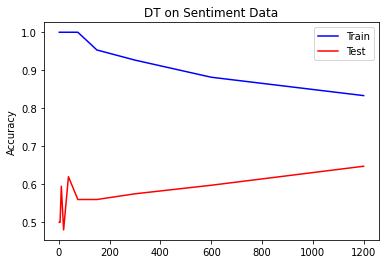

In [1]:
import dt
from imports import *

curve = runClassifier.learningCurveSet(dt.DT({'maxDepth': 9}), datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data', curve)

**We should see training accuracy (roughly) going down and test accuracy (roughly) going up. Why does training accuracy tend to go down? Why is test accuracy not monotonically increasing? You should also see jaggedness in the test curve toward the left. Why?**